# Table of contents
1. [Introduction](#introduction)
    1. [Imports](#imports)
    2. [Loading data](#load_data)
2. [Exploratory Data Analysis](#eda)
    1. [Data info](#data_info)
    2. [Price distribution](#price_distr)
    3. [Feature vs price plots](#feat_vs_price)
    4. [Correlation matrix](#corr_mat)
3. [Data preparation](#data_prep)
    1. ['33 bedrooms' case](#33bedrm)
    2. [Outliers handling](#outliers)
    3. [Visualisations of data without outliers](#expl2)
    4. [Picking features and creating datasets](#datasets)
    5. [Data spliting to test and train samples](#split)
4. [Machine learning models](#ml_intro)
    1. [Linear regression](#lr)
    2. [KNeighbors](#knn)
    3. [RandomForest regression](#rf)
5. [Results overview](#results)
    1. [R$^{2}$ scores combined](#r_comb)
    2. [R$^{2}$ vs dataset for each model](#r_vs_data)

## Introduction <a name="introduction"></a>
Data source:
https://www.kaggle.com/harlfoxem/housesalesprediction 

#### Imports <a name="imports"></a>

In [2]:
from __future__ import division
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8 # universal plot size
pd.options.mode.chained_assignment = None  # default='warn', disables pandas warnings about assigments
njobs = 2 # number of jobs

##### Loading Data <a name='load_data'></a>

In [5]:
data = pd.read_csv('kc_house_data.csv', iterator=False, parse_dates=['date'])

## Exploratory Data Analysis <a name='eda'></a>

In [6]:
data.head(10) # to see columns and first 10 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [7]:
data.info() # overview of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


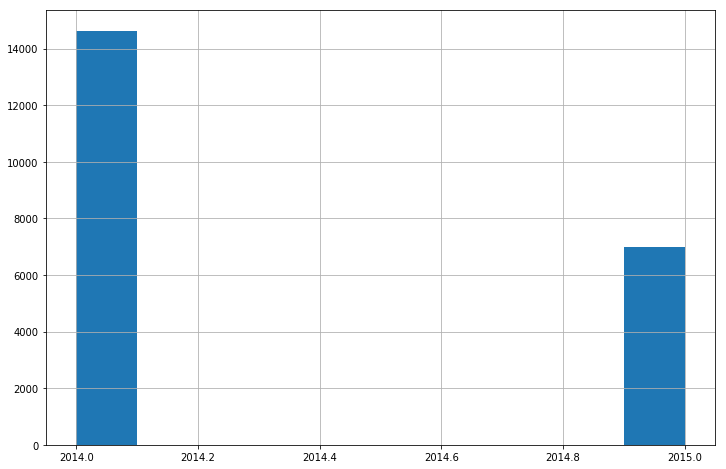

In [8]:
data['date'].dt.year.hist() # to check year of valuation. In case of greater variance I would consider removing older records.

In [9]:
data.describe() # overview of the data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Price distribution <a name='price_distr' ></a>

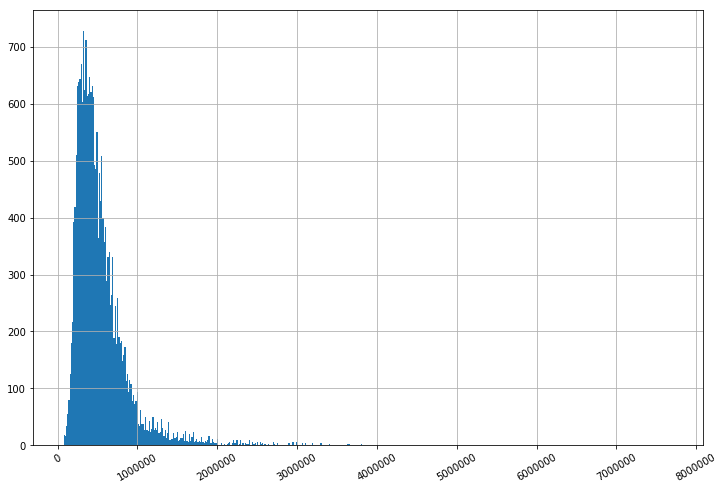

In [10]:
data['price'].hist(xrot=30, bins=500) 

#### Feature vs price plots <a name='feat_vs_price'></a>

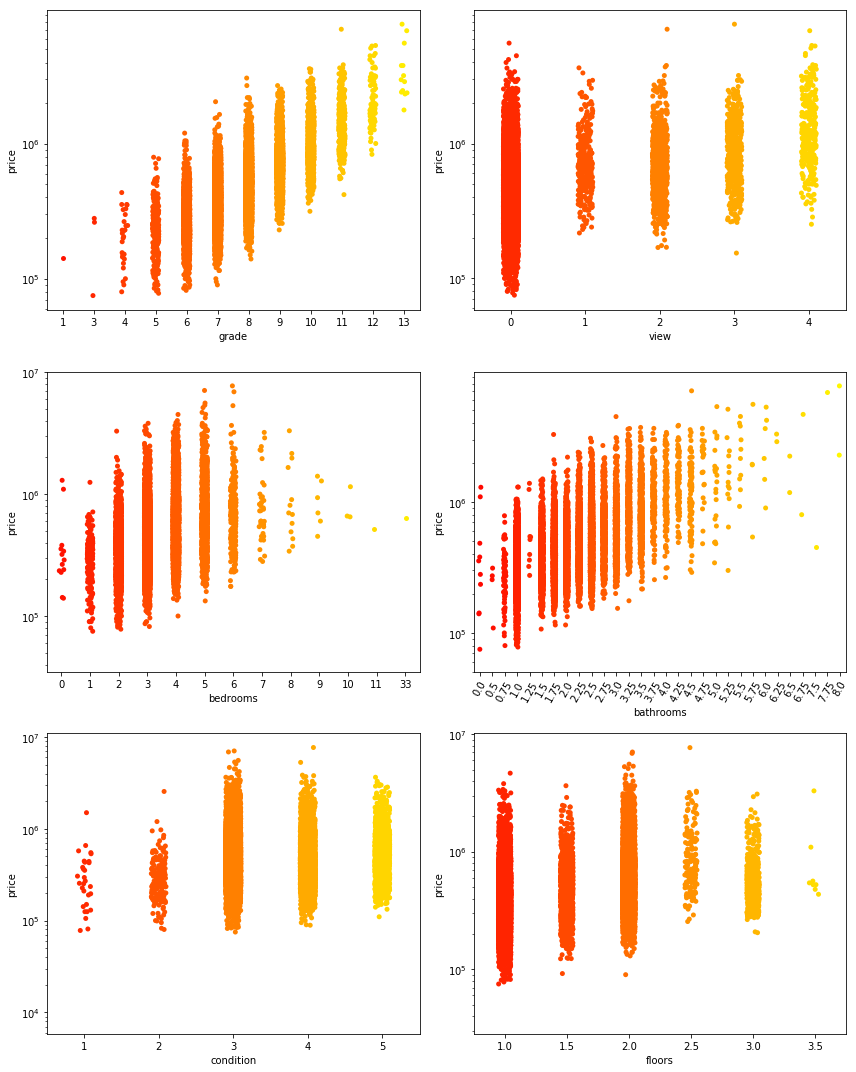

In [11]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (12, 15))
sns.stripplot(x = "grade", y = "price", data = data, jitter=True, ax = ax1, palette='autumn')
sns.stripplot(x = "view", y = "price", data = data, jitter=True, ax = ax2, palette='autumn')
sns.stripplot(x = "bedrooms", y = "price", data = data, jitter=True, ax = ax3, palette='autumn')
sns.stripplot(x = "bathrooms", y = "price", data = data, jitter=True, ax = ax4, palette='autumn')
sns.stripplot(x = "condition", y = "price", data = data, jitter=True, ax = ax5, palette='autumn')
sns.stripplot(x = "floors", y = "price", data = data, jitter=True, ax = ax6, palette='autumn')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=60)
for i in range(1,7):
    a = eval('ax'+str(i))
    a.set_yscale('log')
plt.tight_layout()

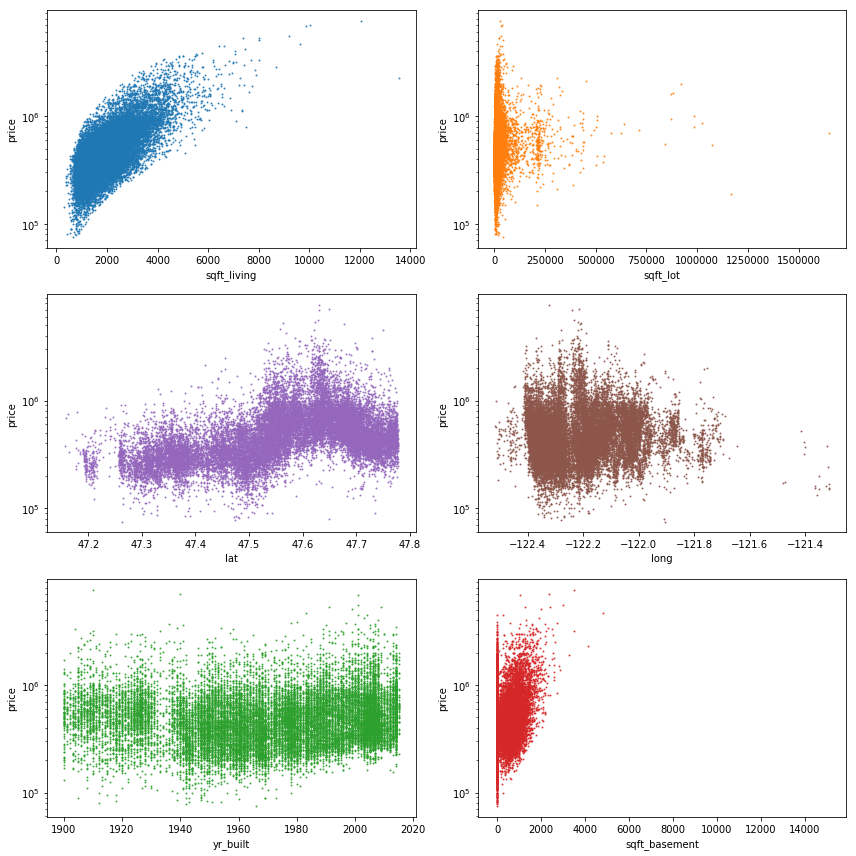

In [12]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (12, 12))
sns.regplot(x = 'sqft_living', y = 'price', data = data, ax = ax1, fit_reg=False, scatter_kws={"s": 1})
sns.regplot(x = 'sqft_lot', y = 'price', data = data, ax = ax2, fit_reg=False, scatter_kws={"s": 1})
sns.regplot(x = 'yr_built', y = 'price', data = data, ax = ax5, fit_reg=False, scatter_kws={"s": 1})
sns.regplot(x = 'sqft_basement', y = 'price', data = data, ax = ax6, fit_reg=False, scatter_kws={"s": 1})
sns.regplot(x = 'lat', y = 'price', data = data, ax = ax3, fit_reg=False, scatter_kws={"s": 1})
sns.regplot(x = 'long', y = 'price', data = data, ax = ax4, fit_reg=False, scatter_kws={"s": 1})
for i in range(1,7):
    a = eval('ax'+str(i))
    a.set_yscale('log')
plt.tight_layout()

#### Correlations matrix <a name='corr_mat'></a>

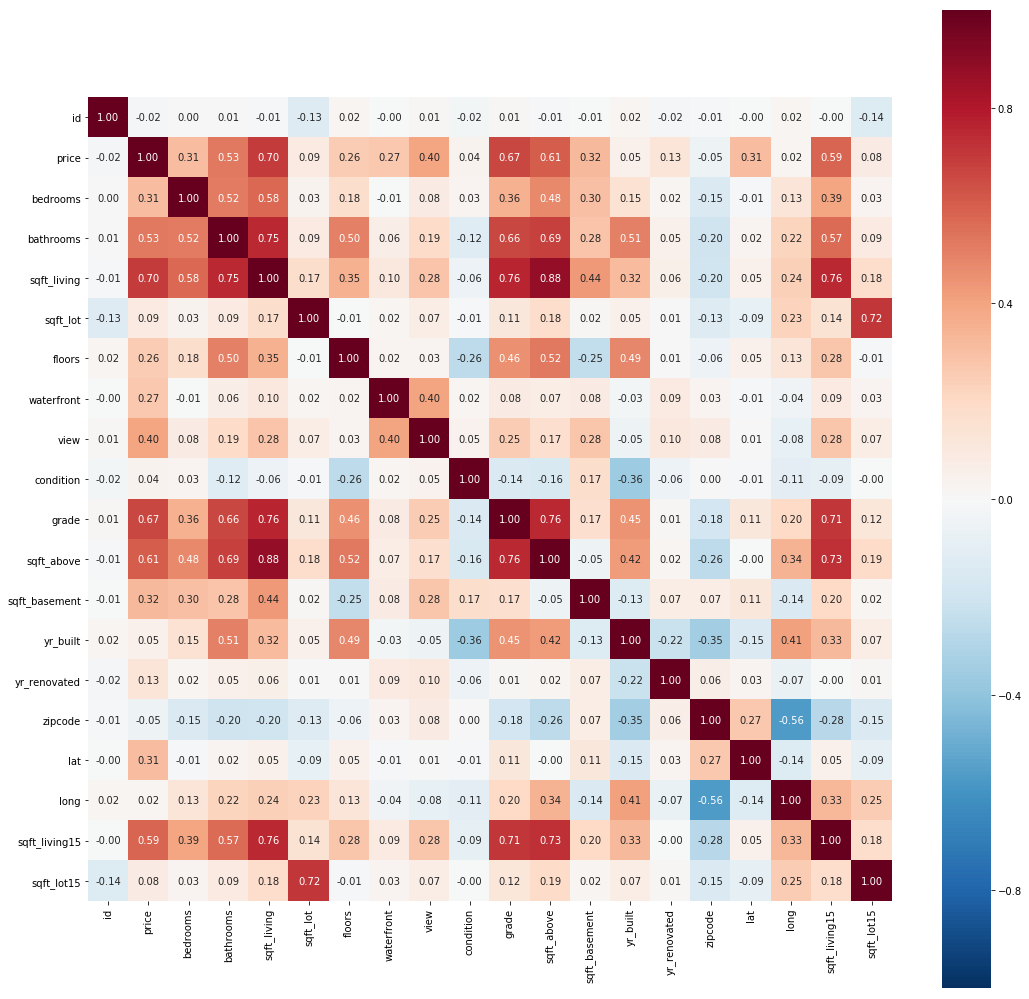

In [13]:
corrmat = data.corr() # correlations between features
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(corrmat, square = True, cmap = 'RdBu_r', vmin = -1, vmax = 1, annot=True, fmt='.2f', ax = ax)

## Data preparation <a name='data_prep'></a>

#### "33 bedrooms" case <a name='33bedrm'></a>
By taking a look at data.describe() one can see house with 33 bedrooms, which seem to be strange in compare to the others. In the next few lines I will try to examine this case. I guess that's a typo and it should be "3" instead of "33".

In [14]:
# selecting house with 33 bedrooms
myCase = data[data['bedrooms']==33]
myCase

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [15]:
# data without '33 bedrooms' house
theOthers = data[data['bedrooms']!=33]
theOtherStats = theOthers.describe()
theOtherStats

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161200e+04,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,4.580402e+09,5.400835e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,0.007542,0.234314,3.409356,7.656904,1788.425319,291.495697,1971.006247,84.406163,98077.938645,47.560047,-122.213891,1986.582871,12768.828984
std,2.876594e+09,3.671351e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.086519,0.766334,0.650668,1.175477,828.094487,442.580931,29.373636,401.688123,53.505993,0.138564,0.140829,685.392610,27304.756179
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [16]:
newDf = theOthers[['bedrooms', 'bathrooms', 'sqft_living']]
newDf = newDf[(newDf['bedrooms'] > 0) & (newDf['bathrooms'] > 0)]
newDf['bathrooms/bedrooms'] = newDf['bathrooms']/newDf['bedrooms']
newDf['sqft_living/bedrooms'] = newDf['sqft_living']/newDf['bedrooms']

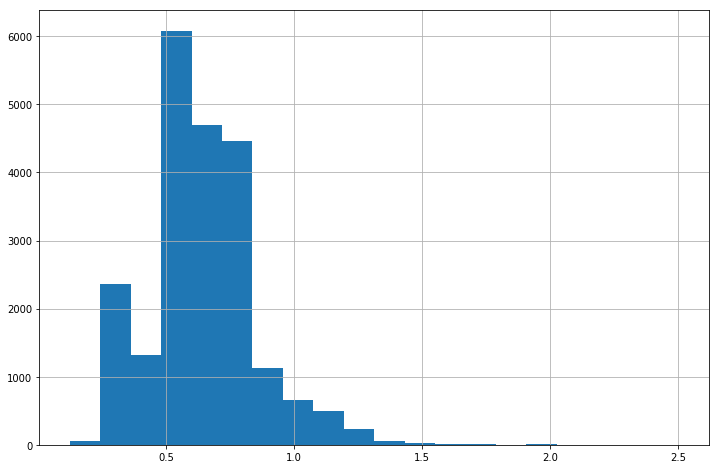

In [17]:
newDf['bathrooms/bedrooms'].hist(bins=20)

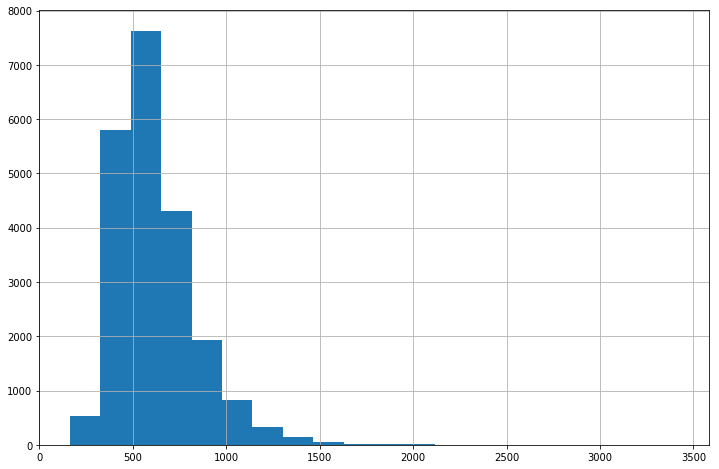

In [18]:
newDf['sqft_living/bedrooms'].hist(bins=20)

Bathrooms/Bedrooms ratio

In [19]:
# values for other properties
othersMeanBB = np.mean(newDf['bathrooms/bedrooms']) # mean bathroom/bedroom ratio
othersStdBB = np.std(newDf['bathrooms/bedrooms']) # std of bathroom/bedroom ratio

# values for suspicious house: myCase - real data; myCase - if there would be 3 bedrooms
myCaseBB = float(myCase['bathrooms'])/float(myCase['bedrooms'])
myCase2BB = float(myCase['bathrooms'])/3. # if there would be 3 bedrooms

print ('{:10}: {:6.3f} bathroom per bedroom'.format('"33" case', myCaseBB))
print ('{:10}: {:6.3f} bathroom per bedroom'.format('"3" case', myCase2BB))
print ('{:10}: {:6.3f}+/-{:.3f} bathroom per bedroom'.format('The others', othersMeanBB, othersStdBB))

"33" case :  0.053 bathroom per bedroom
"3" case  :  0.583 bathroom per bedroom
The others:  0.641+/-0.212 bathroom per bedroom


sqft_living/Bedrooms ratio

In [20]:
# values for other properties
othersMeanSB = np.mean(newDf['sqft_living/bedrooms']) # mean sqft_living/bedroom ratio
othersStdSB = np.std(newDf['sqft_living/bedrooms']) # std of sqft_living/bedroom ratio

# values for suspicious house: myCase - real data; myCase - if there would be 3 bedrooms
myCaseSB = float(myCase['sqft_living'])/float(myCase['bedrooms'])
myCase2SB = float(myCase['sqft_living'])/3. # if there would be 3 bedrooms

print ('{:10}: {:6.3f} sqft per bedroom'.format('"33" case', myCaseSB))
print ('{:10}: {:6.3f} sqft per bedroom'.format('"3" case', myCase2SB))
print ('{:10}: {:6.3f}+/-{:.3f} sqft per bedroom'.format('The others', othersMeanSB, othersStdSB))

"33" case : 49.091 sqft per bedroom
"3" case  : 540.000 sqft per bedroom
The others: 618.174+/-215.864 sqft per bedroom


###### Conclusion:
"House with 33 bedrooms" dosen't look real. Just in case it will be discarded from dataset.

In [21]:
toDropIndex = myCase.index

In [22]:
data.drop(index=toDropIndex, inplace=True)

In [23]:
stats = data.describe()
stats

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161200e+04,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,4.580402e+09,5.400835e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,0.007542,0.234314,3.409356,7.656904,1788.425319,291.495697,1971.006247,84.406163,98077.938645,47.560047,-122.213891,1986.582871,12768.828984
std,2.876594e+09,3.671351e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.086519,0.766334,0.650668,1.175477,828.094487,442.580931,29.373636,401.688123,53.505993,0.138564,0.140829,685.392610,27304.756179
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Outliers handling <a name ='outliers'></a>
Figures show that there are some 'outliers' in data. They are extraordinary cases. 
Data2 is 2nd dataset with arbitrary excluded outliers. Data2 will contain rows that's price do not differ from the mean by more than 3 std.

In [24]:
data2 = data[np.abs(data['price'] - stats['price']['mean']) <= (3*stats['price']['std'])] # cutting 'price'

#### Visualisations of data without otliers <a name='expl2'></a>

In [25]:
data2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.120600e+04,2.120600e+04,21206.000000,21206.000000,21206.000000,2.120600e+04,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000,21206.000000
mean,4.592245e+09,5.068389e+05,3.352306,2.086461,2032.111431,1.483506e+04,1.487103,0.004338,0.205649,3.407573,7.604310,1751.350373,280.761058,1970.933274,80.087004,98078.275960,47.558943,-122.213639,1960.369046,12642.557484
std,2.878080e+09,2.593303e+05,0.898607,0.737274,837.168695,4.041091e+04,0.538616,0.065725,0.707962,0.649028,1.111361,772.603907,425.364903,29.283709,391.703387,53.400412,0.139467,0.141540,655.344766,27224.850064
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.125403e+09,3.200000e+05,3.000000,1.500000,1410.000000,5.005000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.250000,0.000000,98033.000000,47.467000,-122.329000,1480.000000,5080.000000
50%,3.905040e+09,4.469750e+05,3.000000,2.250000,1890.000000,7.560000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1975.000000,0.000000,98065.000000,47.569850,-122.231000,1820.000000,7577.000000
75%,7.334500e+09,6.271875e+05,4.000000,2.500000,2500.000000,1.049200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2170.000000,540.000000,1996.000000,0.000000,98118.000000,47.678700,-122.124000,2330.000000,10000.000000
max,9.900000e+09,1.640000e+06,11.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,7320.000000,2850.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


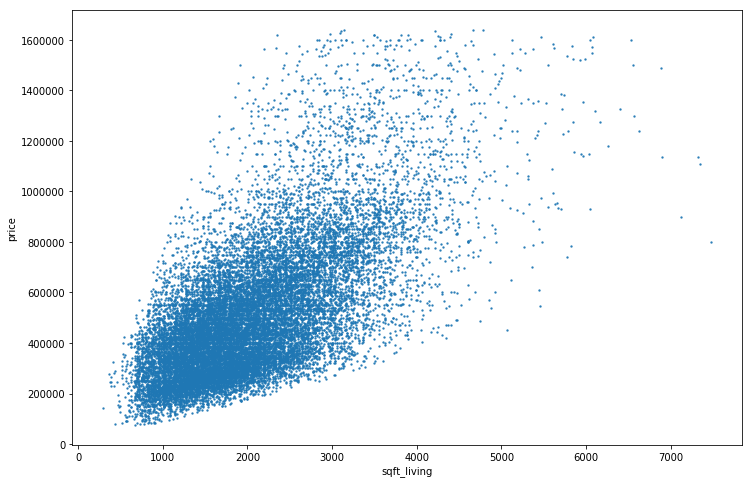

In [26]:
sns.regplot(x = "sqft_living", y = "price", data = data2, fit_reg=False, scatter_kws={"s": 2})

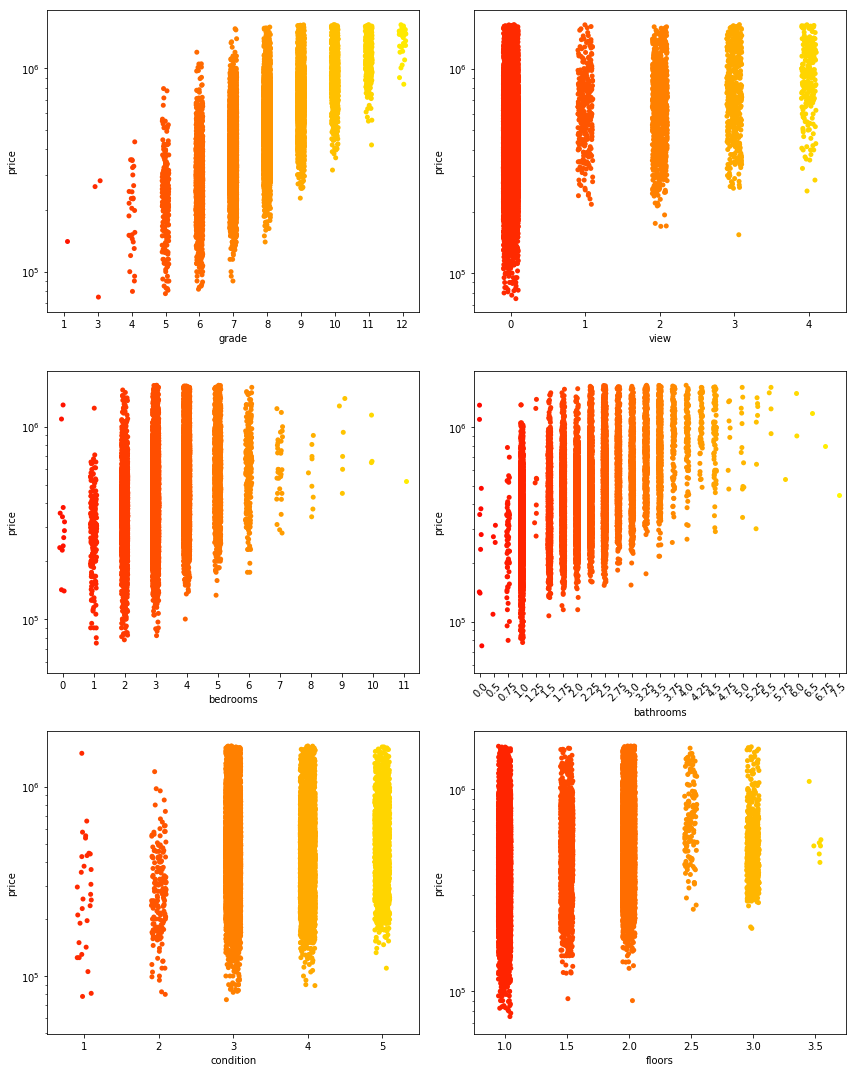

In [27]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (12, 15))
sns.stripplot(x = "grade", y = "price", data = data2, jitter=True, ax = ax1, palette='autumn')
sns.stripplot(x = "view", y = "price", data = data2, jitter=True, ax = ax2, palette='autumn')
sns.stripplot(x = "bedrooms", y = "price", data = data2, jitter=True, ax = ax3, palette='autumn')
sns.stripplot(x = "bathrooms", y = "price", data = data2, jitter=True, ax = ax4, palette='autumn')
sns.stripplot(x = "condition", y = "price", data = data2, jitter=True, ax = ax5, palette='autumn')
sns.stripplot(x = "floors", y = "price", data = data2, jitter=True, ax = ax6, palette='autumn')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)
for i in range(1,7):
    a = eval('ax'+str(i))
    a.set_yscale('log')
plt.tight_layout()

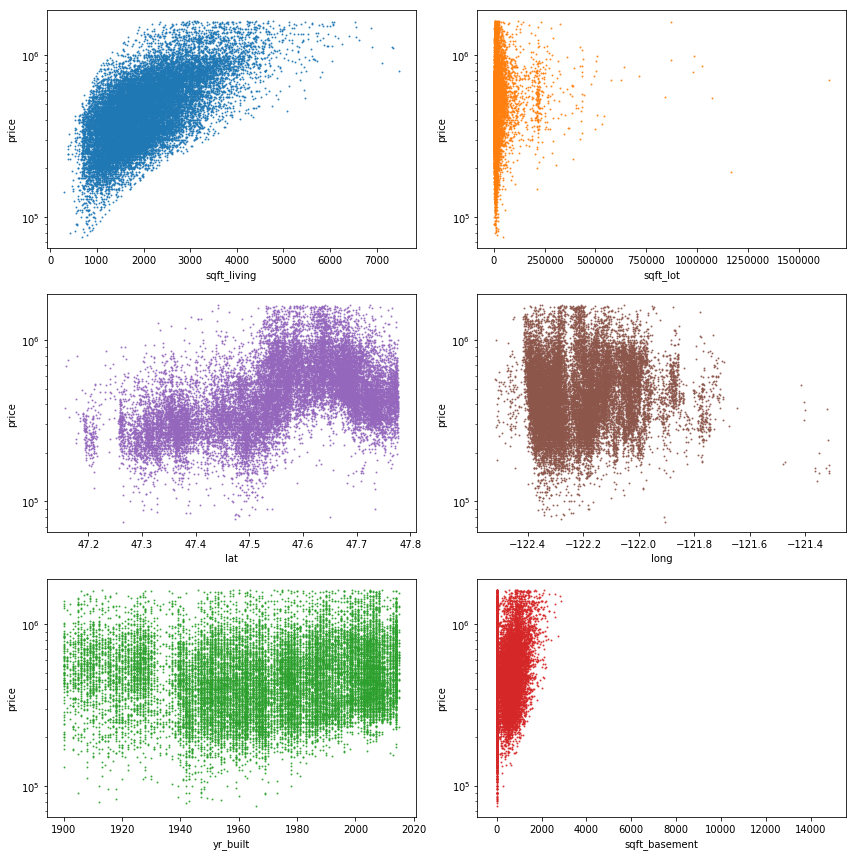

In [28]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (12, 12))
sns.regplot(x = 'sqft_living', y = 'price', data = data2, ax = ax1, fit_reg=False, scatter_kws={"s": 1})
sns.regplot(x = 'sqft_lot', y = 'price', data = data2, ax = ax2, fit_reg=False, scatter_kws={"s": 1})
sns.regplot(x = 'yr_built', y = 'price', data = data2, ax = ax5, fit_reg=False, scatter_kws={"s": 1})
sns.regplot(x = 'sqft_basement', y = 'price', data = data2, ax = ax6, fit_reg=False, scatter_kws={"s": 1})
sns.regplot(x = 'lat', y = 'price', data = data2, ax = ax3, fit_reg=False, scatter_kws={"s": 1})
sns.regplot(x = 'long', y = 'price', data = data2, ax = ax4, fit_reg=False, scatter_kws={"s": 1})
for i in range(1,7):
    a = eval('ax'+str(i))
    a.set_yscale('log')
plt.tight_layout()

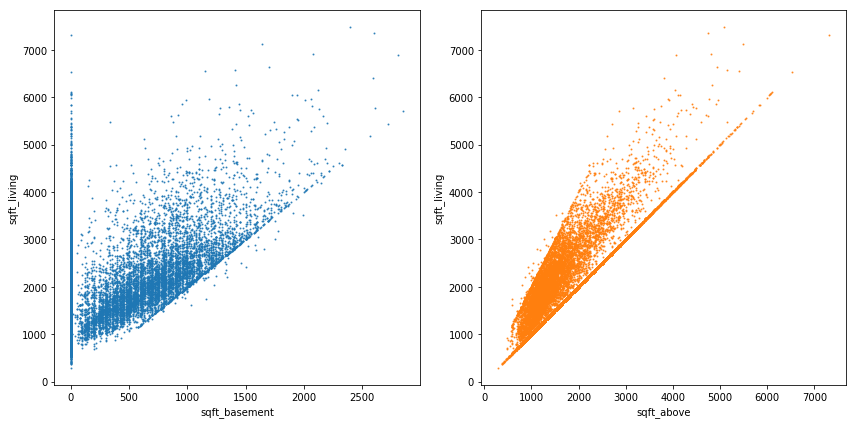

In [29]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (12, 6))
sns.regplot(x = 'sqft_basement', y = 'sqft_living', data = data2, ax = ax1, fit_reg=False, scatter_kws={"s": 1})
sns.regplot(x = 'sqft_above', y = 'sqft_living', data = data2, ax = ax2, fit_reg=False, scatter_kws={"s": 1})
plt.tight_layout()

#### Picking features and creating datasets <a name='datasets'></a>

First we should pick features that we will put into model. Correlation matrix presented above might be helpful while making this decision. From listed features I would use:
* basement
* bathrooms
* bedrooms
* grade
* sqft_living
* sqft_lot
* waterfront
* view

'sqft_basement' and 'sqft_above' seem to be connected with 'sqft_living', so taking into account only 'sqft_living' should work. In case of 'sqft_basement' I will change int value of area to int (0, 1) value indicating whether estate has basement or not.

In [30]:
data['basement'] = data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
data2['basement'] = data2['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

In [31]:
data2.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,0
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,0
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,1
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,0


In [32]:
# removing unnecessary features
dataRaw = data.copy(deep=True)
dataRaw.drop(['date', 'id'], axis = 1, inplace=True)
dataSel1 = data[['price', 'basement', 'bathrooms', 'bedrooms', 'grade', 'sqft_living', 'sqft_lot', 'waterfront', 'view']]
dataSel2 = data2[['price', 'basement', 'bathrooms', 'bedrooms', 'grade', 'sqft_living', 'sqft_lot', 'waterfront', 'view']]

#### Data spliting to test and train samples <a name='split'></a>

In [33]:
# random_state=seed fixes RNG seed. 80% of data will be used for training, 20% for testing.
seed = 2
splitRatio = 0.2

#data with outliers, only columns selected manually
train, test = train_test_split(dataSel1, test_size=splitRatio, random_state=seed) 
Y_trn1 = train['price'].tolist()
X_trn1 = train.drop(['price'], axis=1)
Y_tst1 = test['price'].tolist()
X_tst1 = test.drop(['price'], axis=1)

#data without outliers, only columns selected manually
train2, test2 = train_test_split(dataSel2, test_size=splitRatio, random_state=seed)
Y_trn2 = train2['price'].tolist()
X_trn2 = train2.drop(['price'], axis=1)
Y_tst2 = test2['price'].tolist()
X_tst2 = test2.drop(['price'], axis=1)

#data with outliers and all meaningful columns (date and id excluded)
trainR, testR = train_test_split(dataRaw, test_size=splitRatio, random_state=seed)
Y_trnR = trainR['price'].tolist()
X_trnR = trainR.drop(['price'], axis=1)
Y_tstR = testR['price'].tolist()
X_tstR = testR.drop(['price'], axis=1)

In [34]:
X_trnR.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement
206,3,2.50,2440,4587,2.0,0,0,3,8,2440,0,2010,0,98052,47.7073,-122.114,2750,4587,0
4286,3,2.75,1910,15508,1.0,0,0,3,8,1210,700,1984,0,98023,47.3128,-122.345,2450,7989,1
17216,3,1.75,1320,12528,1.0,0,0,4,7,1320,0,1970,0,98042,47.3234,-122.142,1340,11039,0
10768,4,2.50,2670,5895,2.0,0,0,3,8,2670,0,1999,0,98074,47.6066,-122.016,2820,6531,0
11857,3,2.25,1820,8058,1.0,0,0,3,7,1260,560,1974,0,98034,47.7241,-122.168,1850,7384,1


## Machine learning models <a name = 'ml_intro'></a>

#### Linear regression <a name='lr'></a>

In [35]:
modelLRR = LinearRegression(n_jobs=njobs)
modelLR1 = LinearRegression(n_jobs=njobs)
modelLR2 = LinearRegression(n_jobs=njobs)

In [36]:
modelLRR.fit(X_trnR, Y_trnR)
modelLR1.fit(X_trn1, Y_trn1)
modelLR2.fit(X_trn2, Y_trn2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=2, normalize=False)

In [37]:
scoreR = modelLRR.score(X_tstR, Y_tstR)
score1 = modelLR1.score(X_tst1, Y_tst1)
score2 = modelLR2.score(X_tst2, Y_tst2)

print ("R^2 score: {:8.4f} for {}".format(scoreR, 'Raw data'))
print ("R^2 score: {:8.4f} for {}".format(score1, 'Dataset 1 (with outliers)'))
print ("R^2 score: {:8.4f} for {}".format(score2, 'Dataset 2 (without outliers)'))

R^2 score:   0.7010 for Raw data
R^2 score:   0.6037 for Dataset 1 (with outliers)
R^2 score:   0.5740 for Dataset 2 (without outliers)


In [38]:
lrDict = {'Dataset': ['Raw data', 'Dataset 1', 'Dataset 2'], 
         'R^2 score': [scoreR, score1, score2],
         'Best params': [None, None, None]}
pd.DataFrame(lrDict)

,Best params,Dataset,R^2 score
0,None,Raw data,0.701001
1,None,Dataset 1,0.603656
2,None,Dataset 2,0.573982


#### KNeighbors <a name='knn'></a>

KNeighbors Regressor requires more parameters than Linear Regression, so using GridSearchCV to tune hyperparameters seem to be good idea.

In [39]:
tuned_parameters = {'n_neighbors': range(1,21), 'weights': ['uniform', 'distance']}
knR = GridSearchCV(KNeighborsRegressor(), tuned_parameters, n_jobs=njobs)
kn1 = GridSearchCV(KNeighborsRegressor(), tuned_parameters, n_jobs=njobs)
kn2 = GridSearchCV(KNeighborsRegressor(), tuned_parameters, n_jobs=njobs)

In [40]:
knR.fit(X_trnR, Y_trnR)
kn1.fit(X_trn1, Y_trn1)
kn2.fit(X_trn2, Y_trn2)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'n_neighbors': range(1, 21), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [41]:
scoreR = knR.score(X_tstR, Y_tstR)
score1 = kn1.score(X_tst1, Y_tst1)
score2 = kn2.score(X_tst2, Y_tst2)
parR = knR.best_params_
par1 = kn1.best_params_
par2 = kn2.best_params_

print ("R^2: {:6.4f} {:12} | Params: {}".format(scoreR, 'Raw data', parR))
print ("R^2: {:6.4f} {:12} | Params: {}".format(score1, 'Dataset 1', par1))
print ("R^2: {:6.4f} {:12} | Params: {}".format(score2, 'Dataset 2', par2))

R^2: 0.5317 Raw data     | Params: {'n_neighbors': 8, 'weights': 'distance'}
R^2: 0.5224 Dataset 1    | Params: {'n_neighbors': 17, 'weights': 'uniform'}
R^2: 0.4687 Dataset 2    | Params: {'n_neighbors': 20, 'weights': 'uniform'}


In [42]:
knDict = {'Dataset': ['Raw data', 'Dataset 1', 'Dataset 2'], 
         'R^2 score': [scoreR, score1, score2],
         'Best params': [parR, par1, par2]}
pd.DataFrame(knDict)

,Best params,Dataset,R^2 score
0,"{'n_neighbors': 8, 'weights': 'distance'}",Raw data,0.531736
1,"{'n_neighbors': 17, 'weights': 'uniform'}",Dataset 1,0.522397
2,"{'n_neighbors': 20, 'weights': 'uniform'}",Dataset 2,0.468734


#### RandomForest regression <a name='rf'></a>

As in the previous case using GridSearchCV will help with tunning hyperparameters.

In [43]:
tuned_parameters = {'n_estimators': [10,20,50,100], 'max_depth': [10,20,50]}
rfR = GridSearchCV(RandomForestRegressor(), tuned_parameters, n_jobs=njobs)
rf1 = GridSearchCV(RandomForestRegressor(), tuned_parameters, n_jobs=njobs)
rf2 = GridSearchCV(RandomForestRegressor(), tuned_parameters, n_jobs=njobs)

In [44]:
rfR.fit(X_trnR, Y_trnR)
rf1.fit(X_trn1, Y_trn1)
rf2.fit(X_trn2, Y_trn2)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'n_estimators': [10, 20, 50, 100], 'max_depth': [10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [45]:
scoreR = rfR.score(X_tstR, Y_tstR)
score1 = rf1.score(X_tst1, Y_tst1)
score2 = rf2.score(X_tst2, Y_tst2)
parR = rfR.best_params_
par1 = rf1.best_params_
par2 = rf2.best_params_

print ("R^2: {:6.4f} {:12} | Params: {}".format(scoreR, 'Raw data', parR))
print ("R^2: {:6.4f} {:12} | Params: {}".format(score1, 'Dataset 1', par1))
print ("R^2: {:6.4f} {:12} | Params: {}".format(score2, 'Dataset 2', par2))

R^2: 0.8871 Raw data     | Params: {'max_depth': 50, 'n_estimators': 50}
R^2: 0.7076 Dataset 1    | Params: {'max_depth': 10, 'n_estimators': 100}
R^2: 0.6388 Dataset 2    | Params: {'max_depth': 10, 'n_estimators': 50}


In [46]:
rfDict = {'Dataset': ['Raw data', 'Dataset 1', 'Dataset 2'], 
         'R^2 score': [scoreR, score1, score2],
         'Best params': [parR, par1, par2]}
pd.DataFrame(rfDict)

,Best params,Dataset,R^2 score
0,"{'max_depth': 50, 'n_estimators': 50}",Raw data,0.887137
1,"{'max_depth': 10, 'n_estimators': 100}",Dataset 1,0.707650
2,"{'max_depth': 10, 'n_estimators': 50}",Dataset 2,0.638838


Checking feature importances in Random Forest Regressor model.

In [47]:
rf = RandomForestRegressor(n_estimators=100, max_depth=50, n_jobs=njobs)

In [48]:
rf.fit(X_trnR, Y_trnR)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [49]:
importances = rf.feature_importances_

# calculating std by collecting 'feature_importances_' from every tree in forest
rfStd = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1] # the highest -> the lowest order

In [50]:
xlabels = [X_trnR.columns[i] for i in indices]

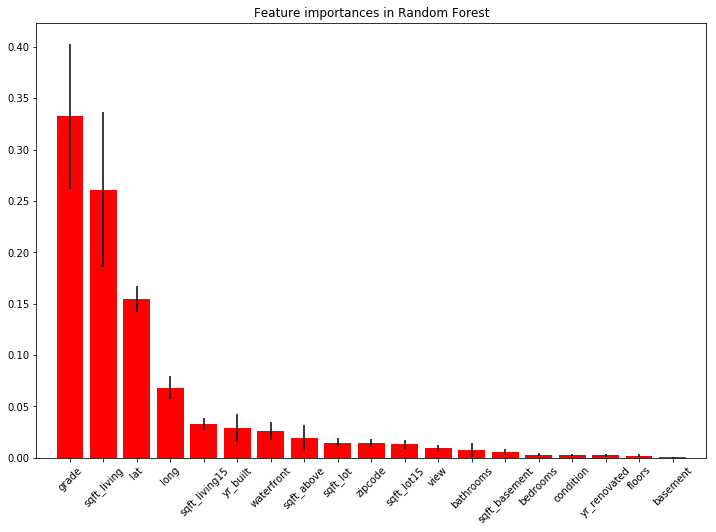

In [51]:
plt.title("Feature importances in Random Forest")
plt.bar(range(len(xlabels)), importances[indices],
       color="r", yerr=rfStd[indices], align="center")
plt.xticks(rotation=45)
plt.xticks(range(len(xlabels)), xlabels)
plt.xlim([-1, len(xlabels)])
plt.show()

## Results overview <a name='results'></a>
lr: LinearRegression  
kn: KNeighborsRegressor   
rf: RandomForestRegressor  

In [52]:
resDict = {'lr' : lrDict, 'kn' : knDict, 'rf' : rfDict}

In [53]:
dict_of_df = {k: pd.DataFrame(v) for k,v in resDict.items()}
resDf = pd.concat(dict_of_df, axis=0)
resDf

Best params    Dataset  R^2 score
kn 0  {'n_neighbors': 8, 'weights': 'distance'}   Raw data   0.531736
   1  {'n_neighbors': 17, 'weights': 'uniform'}  Dataset 1   0.522397
   2  {'n_neighbors': 20, 'weights': 'uniform'}  Dataset 2   0.468734
lr 0                                       None   Raw data   0.701001
   1                                       None  Dataset 1   0.603656
   2                                       None  Dataset 2   0.573982
rf 0      {'max_depth': 50, 'n_estimators': 50}   Raw data   0.887137
   1     {'max_depth': 10, 'n_estimators': 100}  Dataset 1   0.707650
   2      {'max_depth': 10, 'n_estimators': 50}  Dataset 2   0.638838

##### R$^{2}$ scores combined <a name='r_comb'></a>

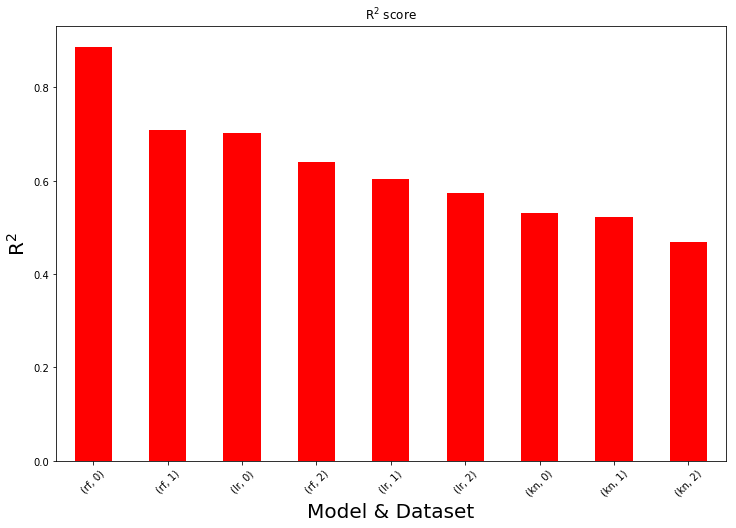

In [54]:
toPlot = resDf.sort_values(by=['R^2 score'], ascending=False)
fig, axes = plt.subplots(ncols=1, figsize=(12, 8))
toPlot['R^2 score'].plot(ax=axes, kind='bar', title='R$^{2}$ score', color="r")
plt.ylabel('R$^{2}$', fontsize=20)
plt.xlabel('Model & Dataset', fontsize=20)
plt.xticks(rotation=45)
plt.show()

##### R$^{2}$ vs dataset for each model <a name='r_vs_data'></a>

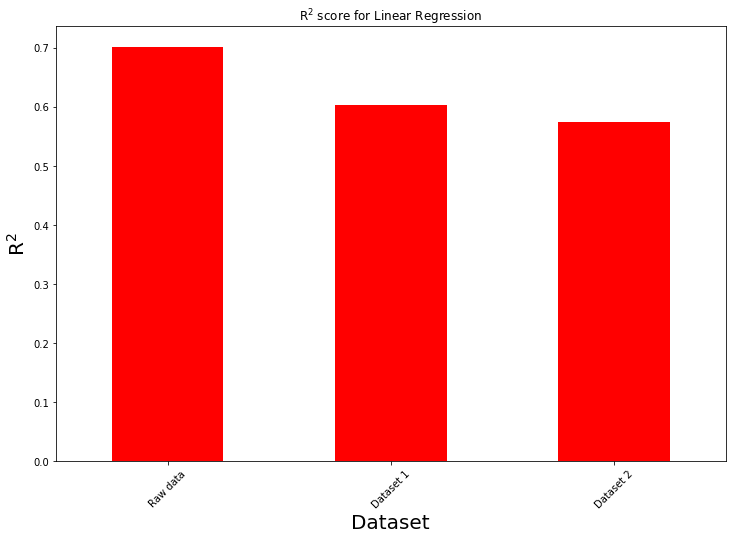

In [55]:
toPlot = resDf.sort_values(by=['R^2 score'], ascending=False)
fig, axes = plt.subplots(ncols=1, figsize=(12, 8))
toPlot.loc['lr']['R^2 score'].plot(ax=axes, kind='bar', title='R$^{2}$ score for Linear Regression', color="r")
plt.ylabel('R$^{2}$', fontsize=20)
plt.xlabel('Dataset', fontsize=20)
plt.xticks(rotation=45)
plt.xticks(range(3), [toPlot.loc['lr']['Dataset'][i] for i in range(3)])
plt.show()

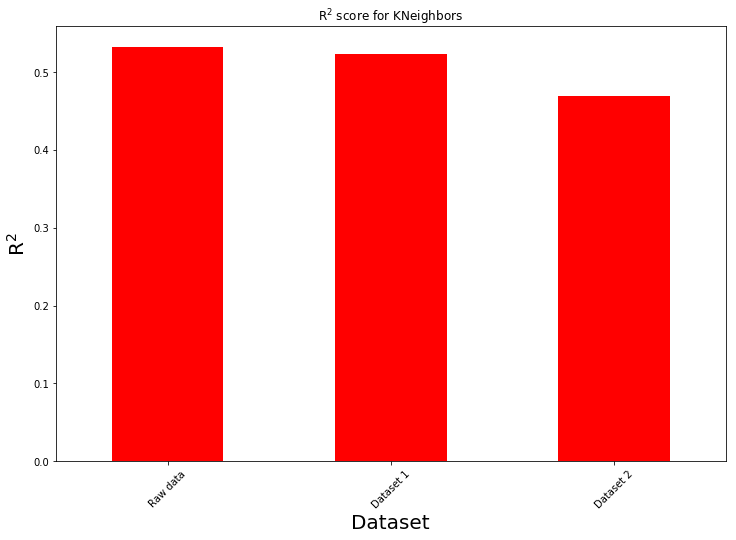

In [56]:
toPlot = resDf.sort_values(by=['R^2 score'], ascending=False)
fig, axes = plt.subplots(ncols=1, figsize=(12, 8))
toPlot.loc['kn']['R^2 score'].plot(ax=axes, kind='bar', title='R$^{2}$ score for KNeighbors', color="r")
plt.ylabel('R$^{2}$', fontsize=20)
plt.xlabel('Dataset', fontsize=20)
plt.xticks(rotation=45)
plt.xticks(range(3), [toPlot.loc['kn']['Dataset'][i] for i in range(3)])
plt.show()

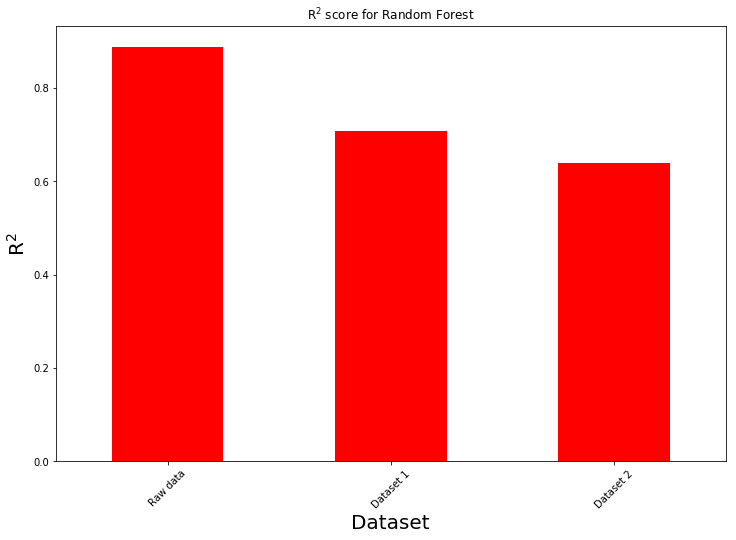

In [57]:
toPlot = resDf.sort_values(by=['R^2 score'], ascending=False)
fig, axes = plt.subplots(ncols=1, figsize=(12, 8))
toPlot.loc['rf']['R^2 score'].plot(ax=axes, kind='bar', title='R$^{2}$ score for Random Forest', color="r")
plt.ylabel('R$^{2}$', fontsize=20)
plt.xlabel('Dataset', fontsize=20)
plt.xticks(rotation=45)
plt.xticks(range(3), [toPlot.loc['rf']['Dataset'][i] for i in range(3)])
plt.show()